In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.fft as fft

In [253]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def generatecenter(s_dim, N, radius_pixels):
    mSample = np.zeros((s_dim,s_dim))
    m_dim = s_dim - radius_pixels - 5              #Possible center points matrix dim
    m_prepad = np.ones((m_dim,m_dim))

    #------Padding-----#
    pad_length = radius_pixels +5  # + 5 for insurance
    m = np.pad(m_prepad, pad_length, pad_with, padder=0) #mask matrix
    
    #---where we start picking points, loop over number of particles N---#
    for x in range(0,N):
        #Create a mask of all available center points
        indices = [(i,j) for i in range(len(m)) for j in range(len(m[i])) if m[i][j] != 0] # generate mask grid
        
        #Out of all available center points, pick a random one
        p = np.random.randint(0,len(indices))
        p1 = indices[p]
        
        #Loop for updating mask and sample matrix with every generated particle
        for i in range(s_dim):
            for j in range(s_dim):
                if (i-p1[0])*(i-p1[0]) + (j-p1[1])*(j-p1[1]) <= (radius_pixels*2 )**2:
                    #masking the circle
                    m[i][j] = 0                                                    
                if (i-p1[0])*(i-p1[0]) + (j-p1[1])*(j-p1[1]) <= (radius_pixels)**2:
                    #creating the circle on the sample matrix
                    mSample[i][j] = 1                                              
                
    return m, mSample

In [141]:
#-------------Sample--------------#
       
s_dim = 120                                     # dimension of the sample matrix
sample_pixel_size = 2 * 10**(-9)                       #m
a = 2                                           #nm, this is the smallest unit length for our detector
aa = 20 #AA

N = 5                                        # number of particles
radius = 26                                 # radius of particle in nm
radius_meters = radius * 10**(-9)                   # radius in meters
radius_pixels = int(radius*10**(-9) / sample_pixel_size)    # radius in pixels

mSample = np.zeros((s_dim,s_dim))               # generating sample matrix
L = 7.8                                           # sample-detector distance in meters

#constants
c = 2.99792458 * 10**8 
wavelength = 1.5 * 10**(-10)                    #m
frequency = c / wavelength

In [240]:
mSample = np.zeros((s_dim,s_dim))
m_dim = s_dim - radius #Possible center points
m_prepad = np.ones((m_dim,m_dim))
item = 1

#------Padding-----#
pad_length = round(radius/2)
m = np.pad(m_prepad, pad_length, pad_with, padder=0)
radius_pixels

13

In [252]:
indices = [(i,j) for i in range(len(m)) for j in range(len(m[i])) if m[i][j] != 0] # generate mask grid

p1 = np.random.randint(0,len(indices))
indices[p1]

#mask = [(i,j) for i in range(len(m)) for j in range(len(m[i])) if (0.01 < px) & (px < 0.05) & (-0.05 < py) & (py < -0.02)]

(57, 50)

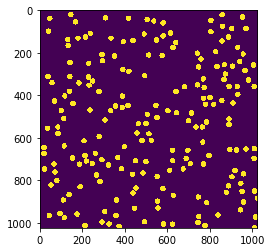

In [260]:
#Generate sample
z = generatecenter(1024, 200, radius_pixels)
plt.imshow(z[1], interpolation ='none')

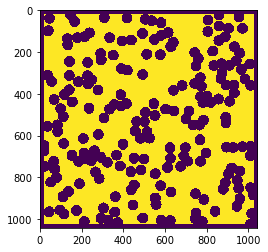

In [261]:
# show masked parts
plt.imshow(z[0], interpolation ='none')